# Lecture 1: Preprocessing

In this lab, we will be exploring how to preprocess tweets for sentiment analysis. We will provide a function for preprocessing tweets during this week's assignment, but it is still good to know what is going on under the hood. By the end of this lecture, you will see how to use the NLTK package to perform a preprocessing pipeline for Twitter datasets.

In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

## About the Twitter dataset
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

The dataset is already downloaded in the Coursera workspace. In a local computer however, you can download the data by doing:

In [2]:
# nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Fco\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

<class 'list'>
<class 'list'>
5000
5000


([<matplotlib.patches.Wedge at 0x2740d14fe88>,
 [Text(6.735557395310444e-17, 1.1, 'Positive'),
  Text(-2.0206672185931328e-16, -1.1, 'Negative')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

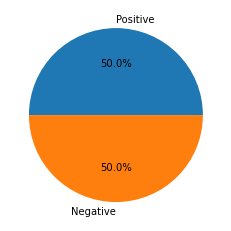

In [5]:
# Import the postive and negative tweets
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

print(type(pos_tweets))
print(type(neg_tweets))

print(len(pos_tweets))
print(len(neg_tweets))

# Print a pie chart of the positive and negative tweets
plt.pie([len(pos_tweets), len(neg_tweets)], labels=['Positive', 'Negative'], autopct='%1.1f%%')

In [10]:
# Print 5 random tweets from each category

# Positive
print(pos_tweets[np.random.randint(0, len(pos_tweets))])

# Negative
print(neg_tweets[np.random.randint(0, len(neg_tweets))])

Happy Friday :-) http://t.co/Q3SZG3brj9
30 minutes and counting just to pass through the EDSA AYALA tunnel... And am still not completely out. :(
